In [6]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor

import os
from settings import BASE_DIR
from data import processing_data
# Loading our dataset

data_path = os.path.join(BASE_DIR, "dataset", "movies_data_processed_v3.csv")
df = pd.read_csv(data_path)
df.head()

,genres,rating,no_of_votes,meta_score,release_date,gross,budget,countries,log_budget,log_no_of_votes,log_gross,log_gross_bin
0,"Martial Arts, Action, Comedy",5.3,6800,34.0,2025.0,17235040.0,18000000.0,United States,16.705882,8.824825,16.662455,3
1,"Action, Drama, Romance, Thriller, Western",6.5,107000,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",17.281246,11.580593,16.740635,3
2,"Animal Adventure, Computer Animation, Fairy Ta...",7.8,200000,73.0,2022.0,481757663.0,90000000.0,"United States, Japan",18.315320,12.206078,19.992952,9
3,"Sci-Fi Epic, Space Sci-Fi, Action, Adventure, ...",7.6,524000,52.0,1997.0,263920180.0,25000000.0,"France, United Kingdom",17.034386,13.169249,19.391157,8
4,"Sci-Fi Epic, Superhero, Urban Adventure, Actio...",7.4,195000,82.0,1978.0,300478449.0,55000000.0,"United States, United Kingdom, Switzerland, Pa...",17.822844,12.180760,19.520887,8


Fold 1
Training Metrics
R2 score: 0.7605
MSE: 17,302,036,694,485,758.0000
MLSE: 2.7336
MAPE: 23.65%
Test Metrics
R2 score: 0.6319
MSE: 21,836,097,149,365,156.0000
MLSE: 5.1467
MAPE: 95.17%


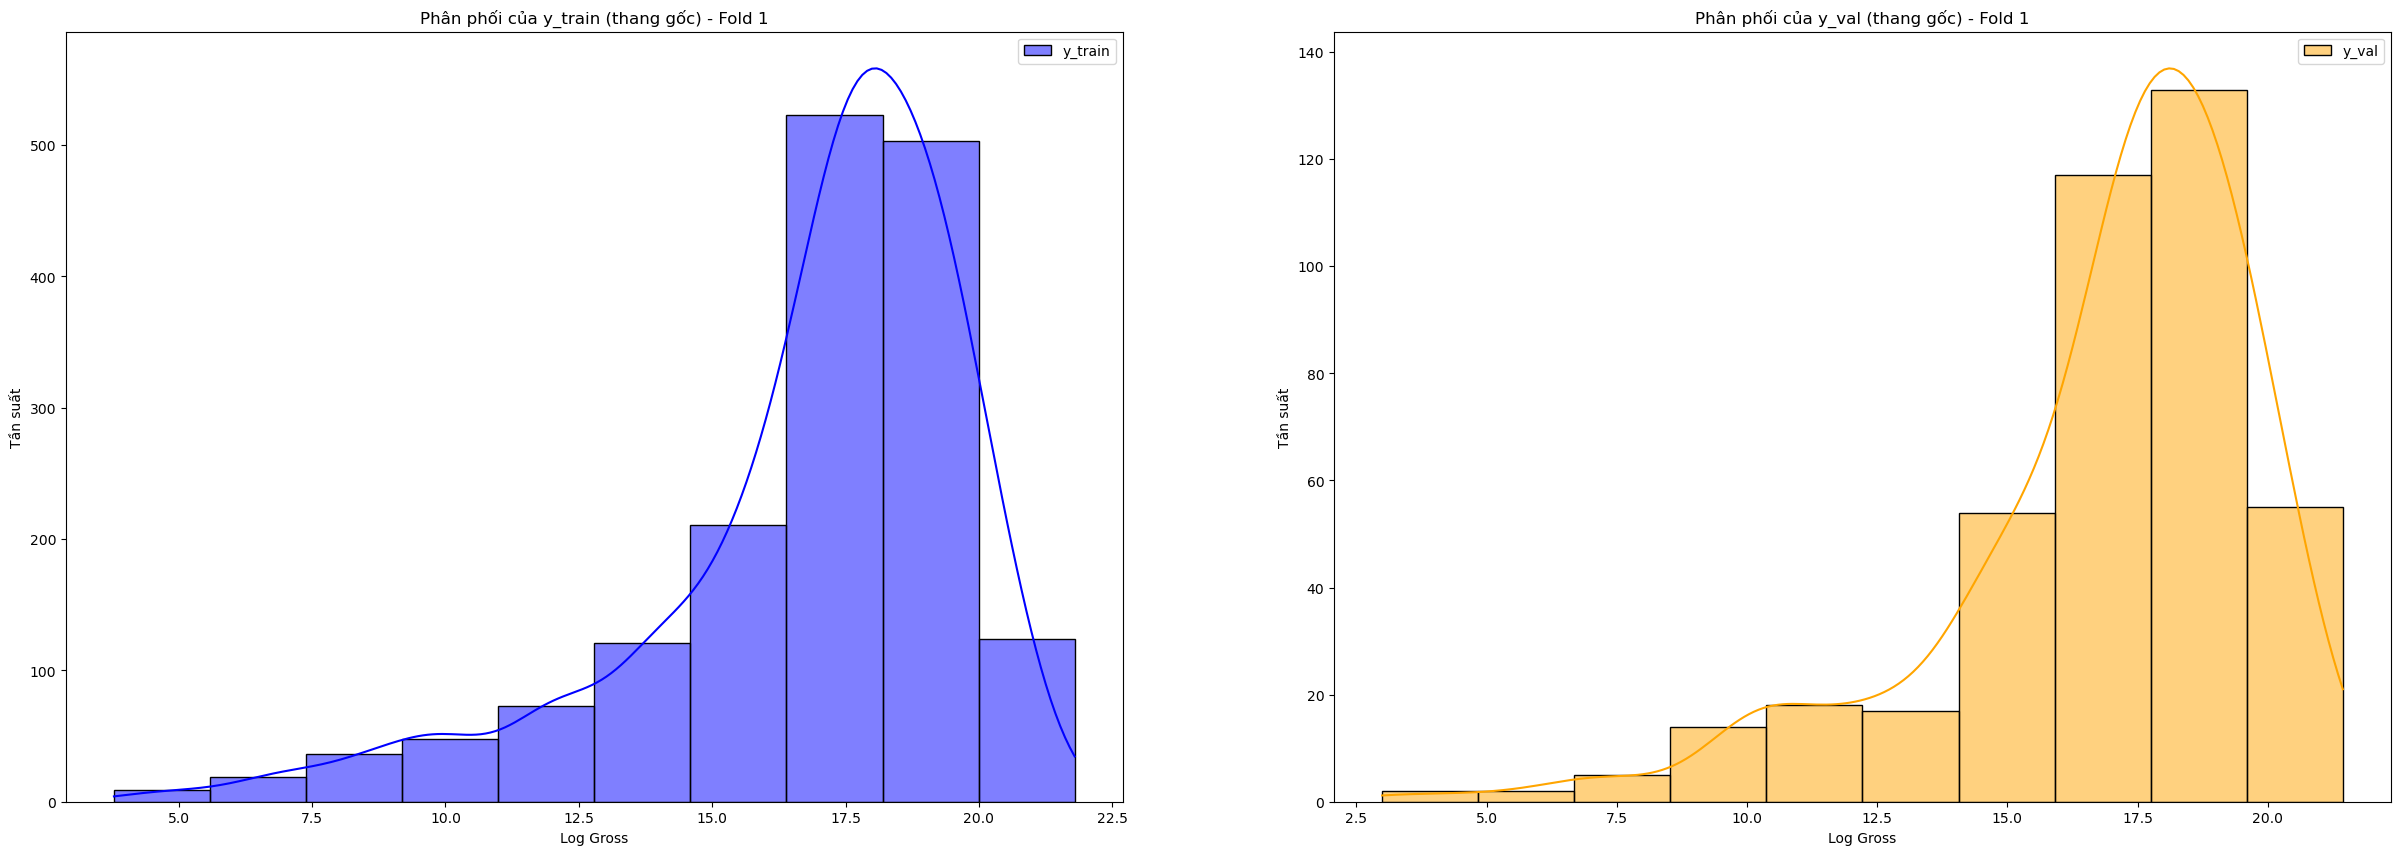

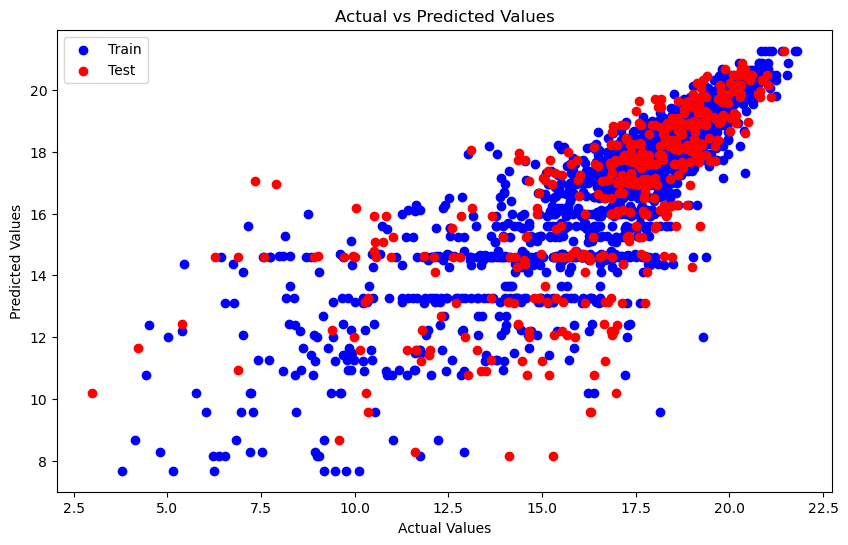

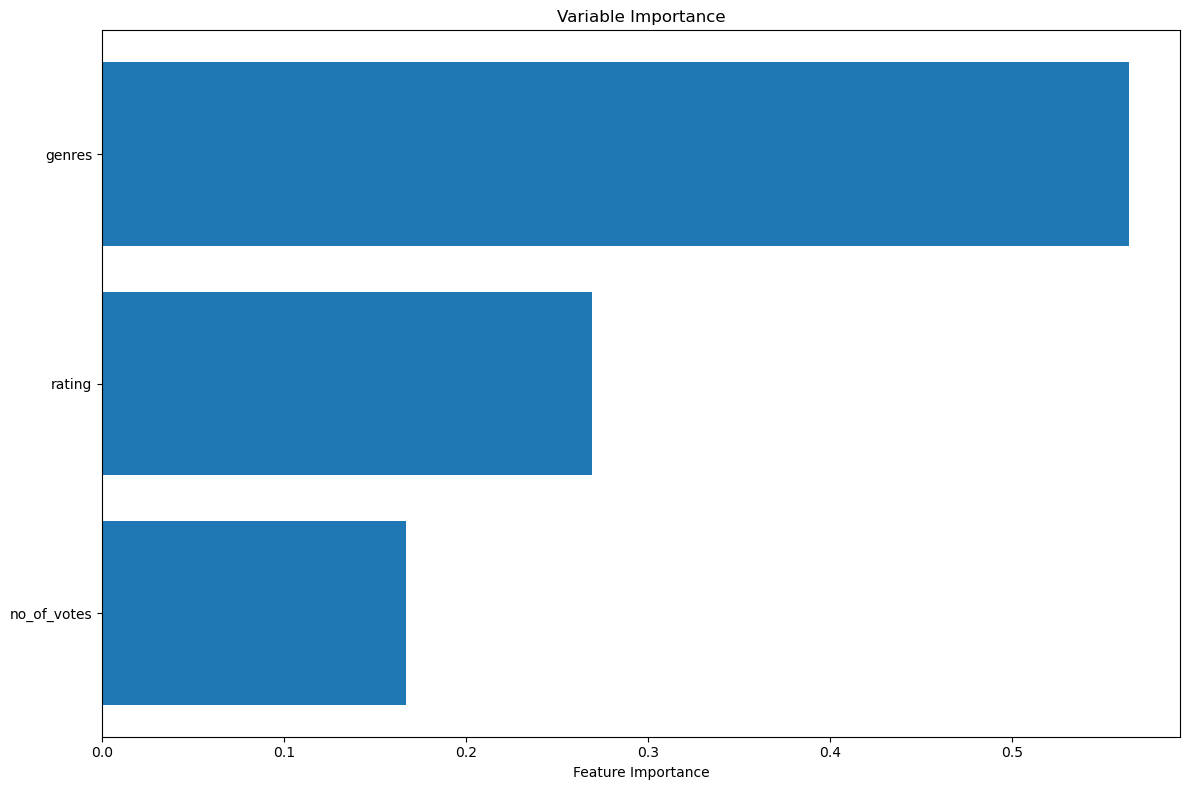

Fold 2
Training Metrics
R2 score: 0.7857
MSE: 14,498,182,563,635,504.0000
MLSE: 2.3989
MAPE: 31.20%
Test Metrics
R2 score: 0.6199
MSE: 29,528,863,842,521,044.0000
MLSE: 5.7370
MAPE: 370.93%


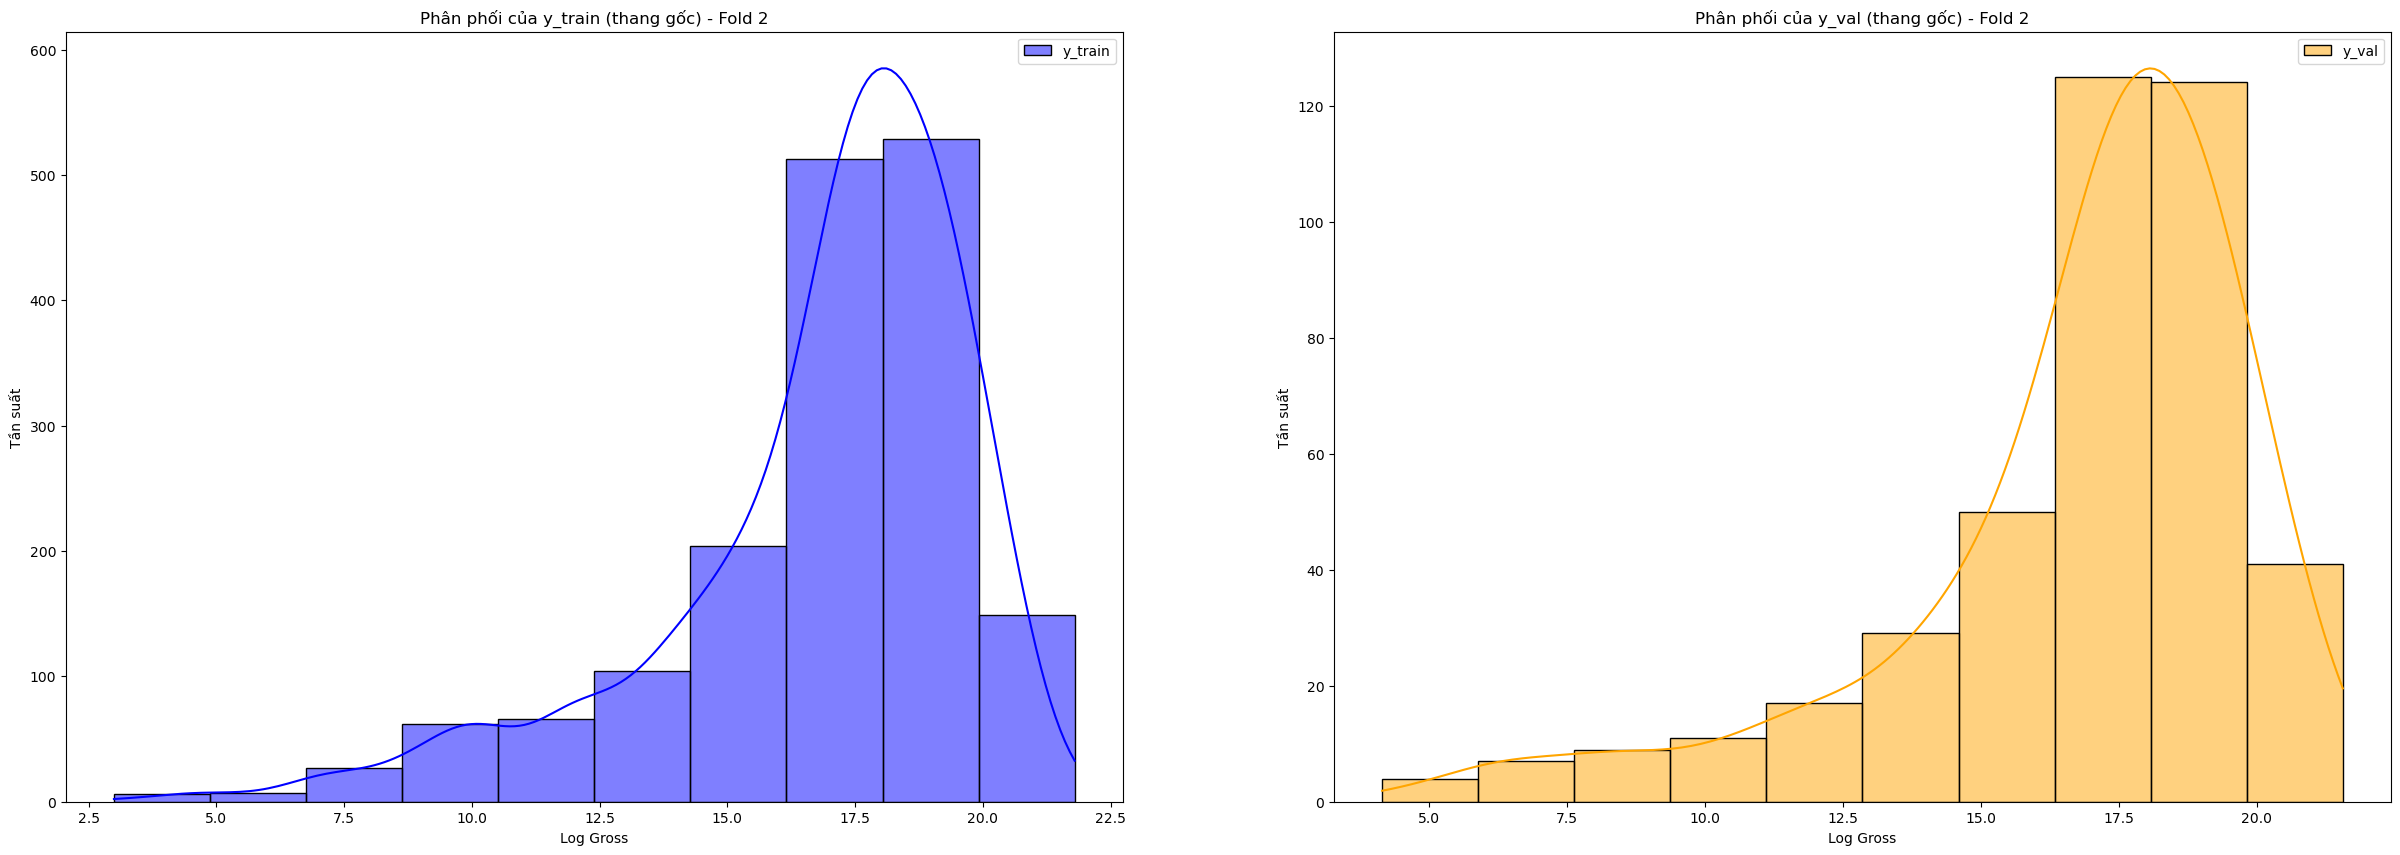

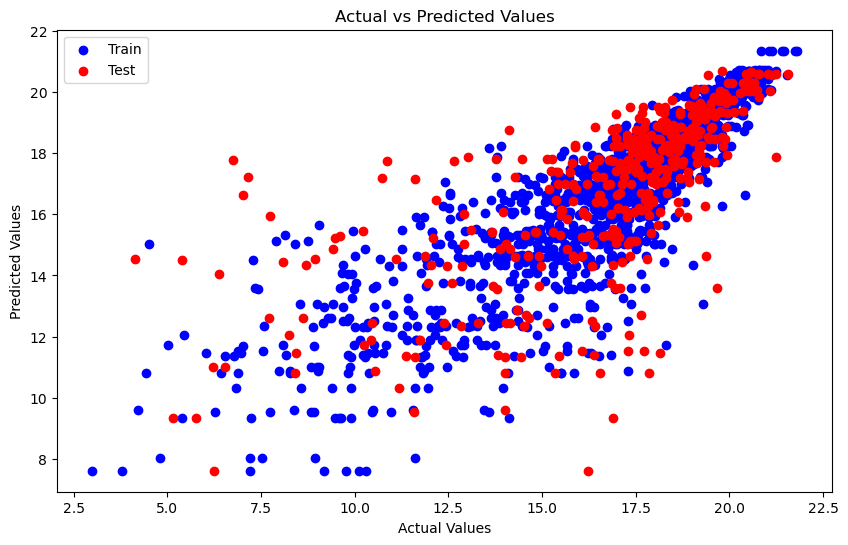

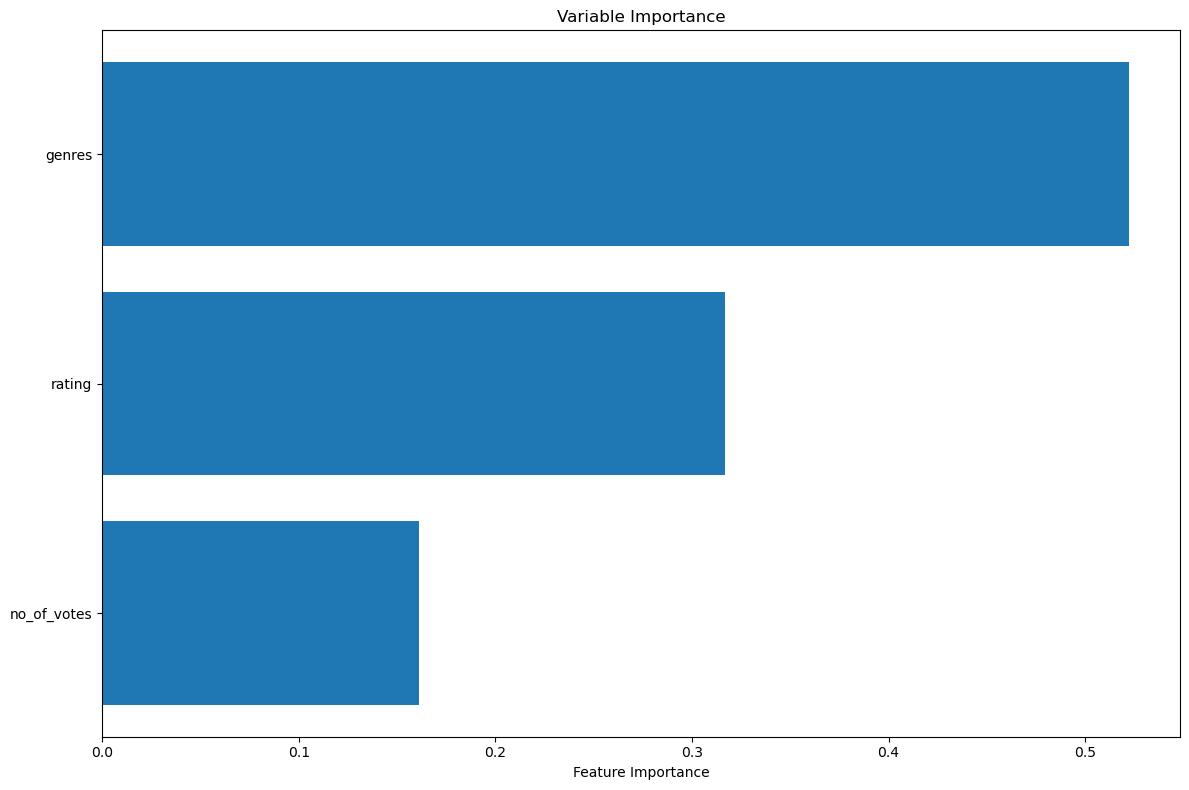

Fold 3
Training Metrics
R2 score: 0.7503
MSE: 15,551,857,024,534,290.0000
MLSE: 2.6007
MAPE: 34.99%
Test Metrics
R2 score: 0.5318
MSE: 46,416,519,574,695,680.0000
MLSE: 4.4129
MAPE: 65.25%


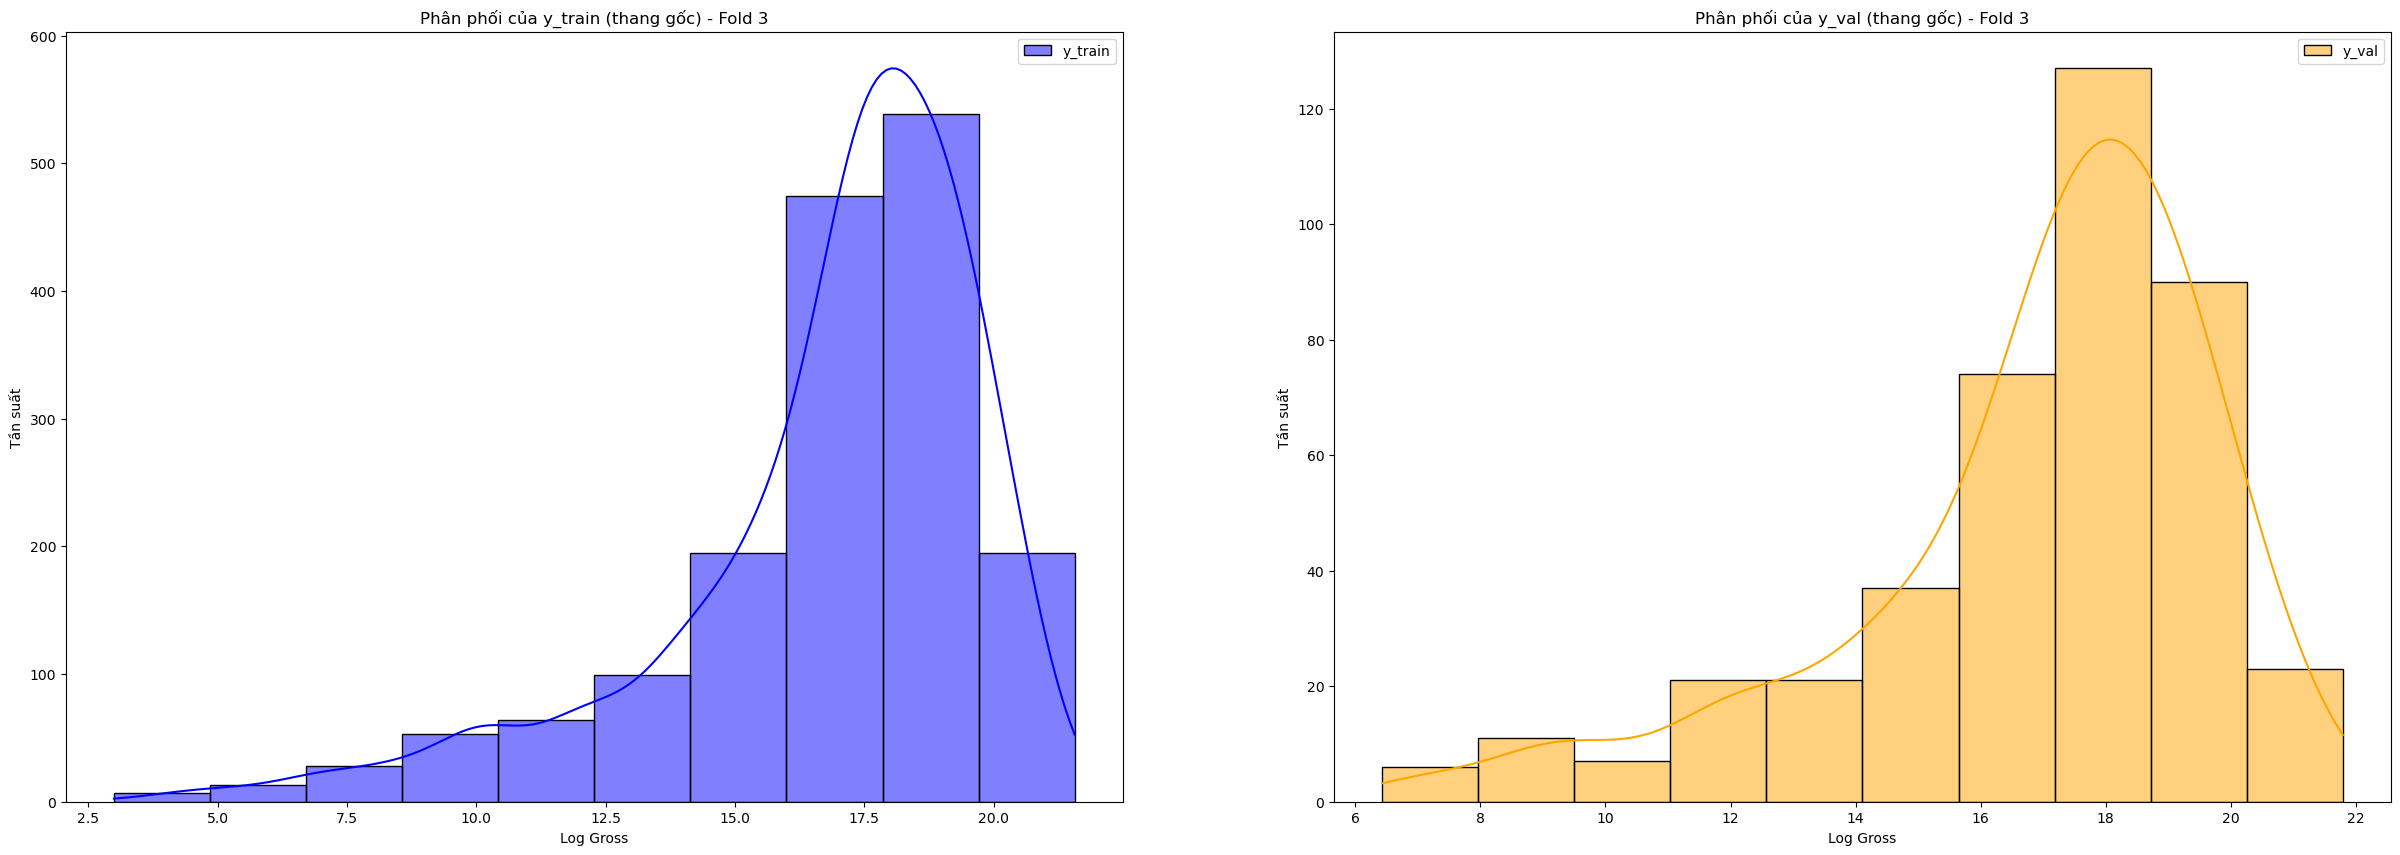

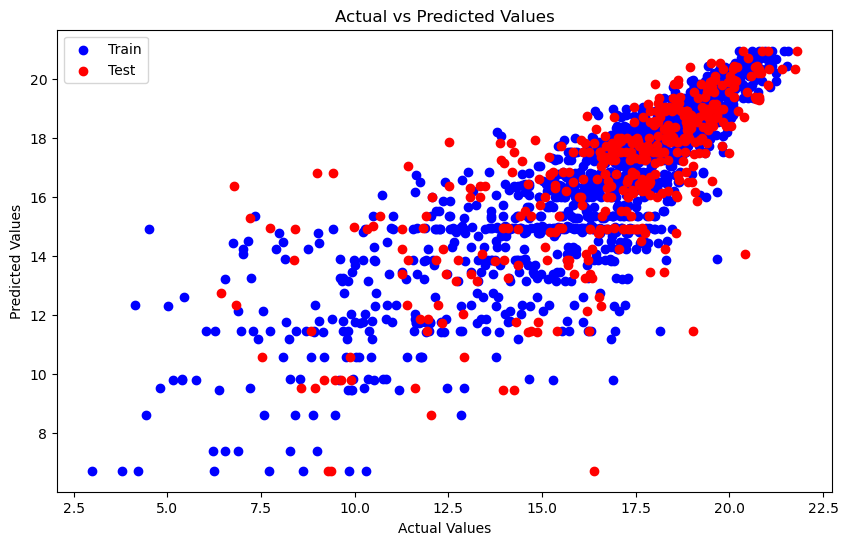

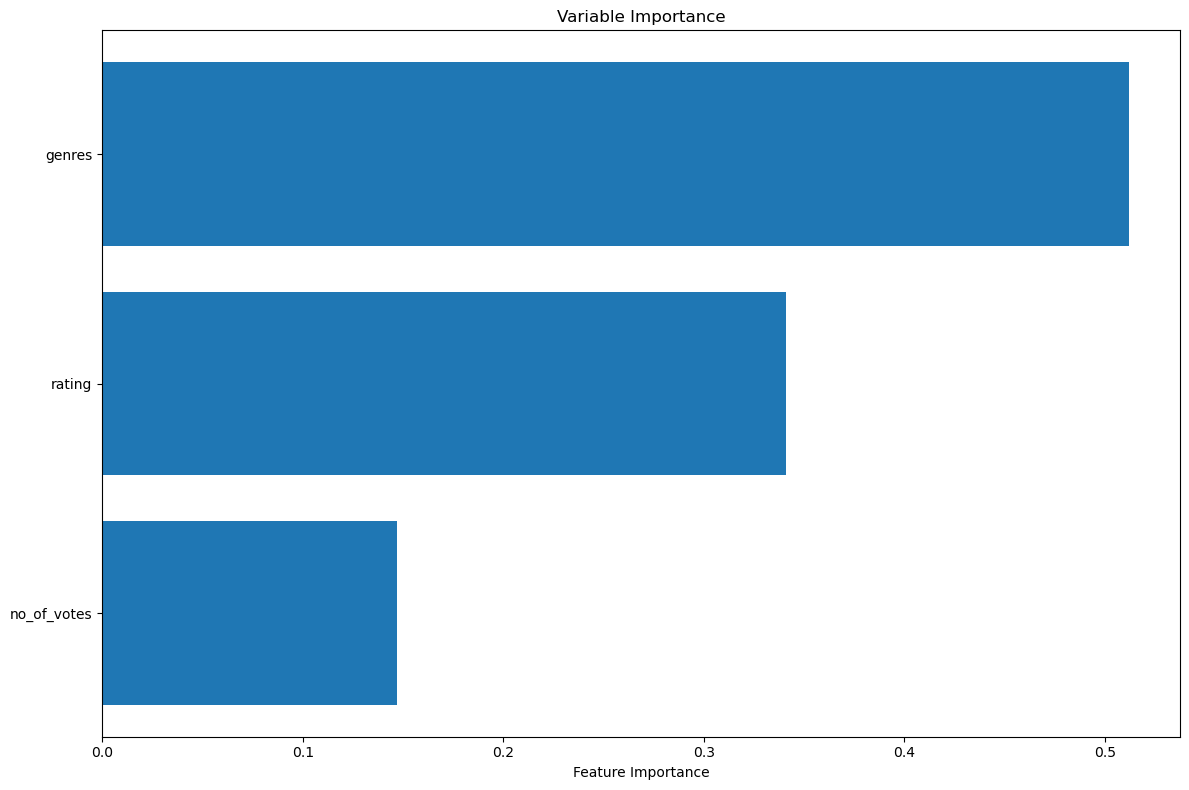

Fold 4
Training Metrics
R2 score: 0.7648
MSE: 17,465,543,392,317,106.0000
MLSE: 2.4752
MAPE: 16.26%
Test Metrics
R2 score: 0.5422
MSE: 23,460,540,221,324,192.0000
MLSE: 5.5294
MAPE: 380.08%


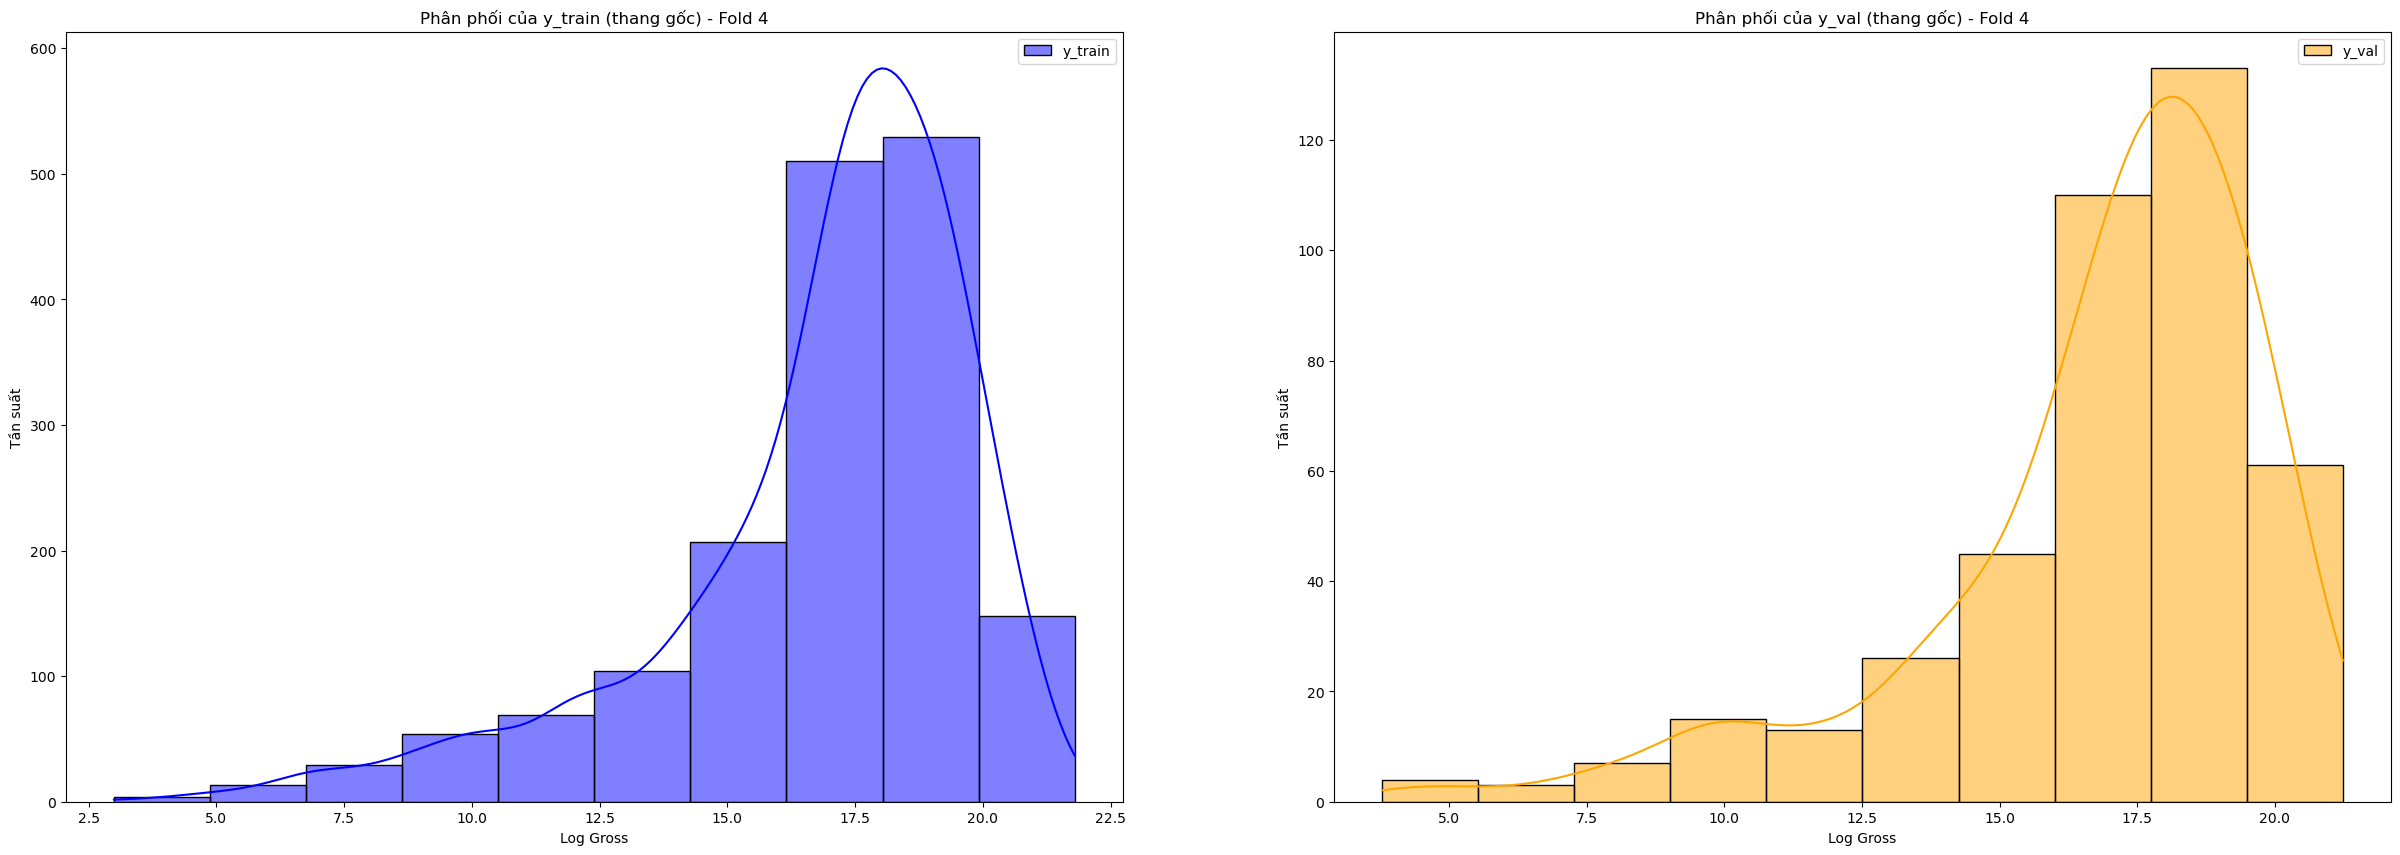

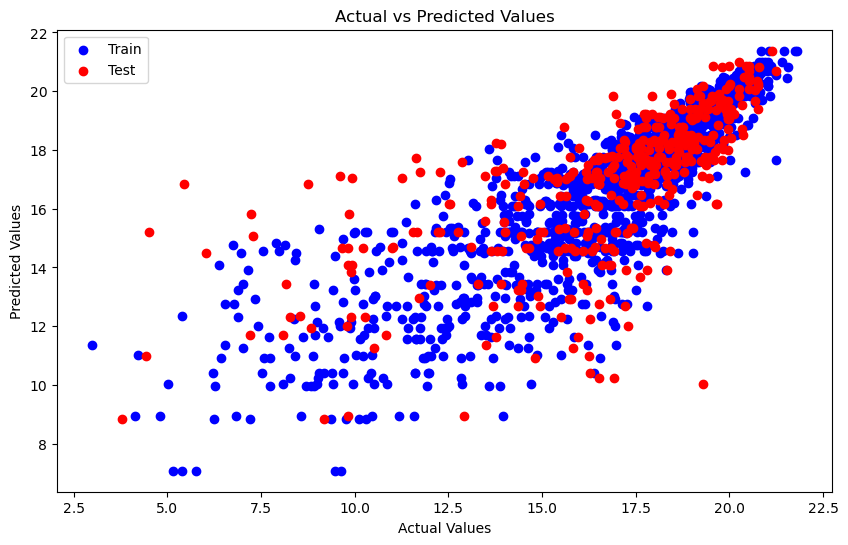

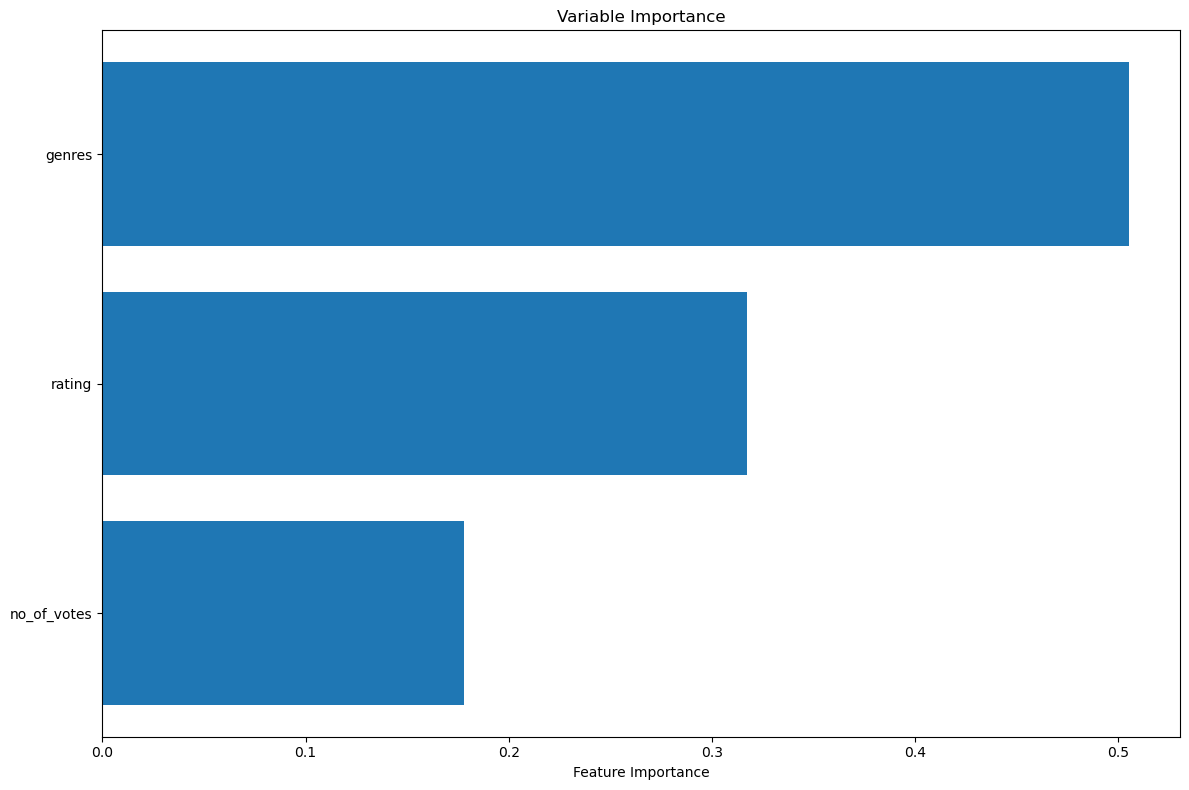

Fold 5
Training Metrics
R2 score: 0.8037
MSE: 14,113,331,374,277,774.0000
MLSE: 2.3265
MAPE: 15.40%
Test Metrics
R2 score: 0.5199
MSE: 29,157,419,801,203,012.0000
MLSE: 5.6018
MAPE: 137.98%


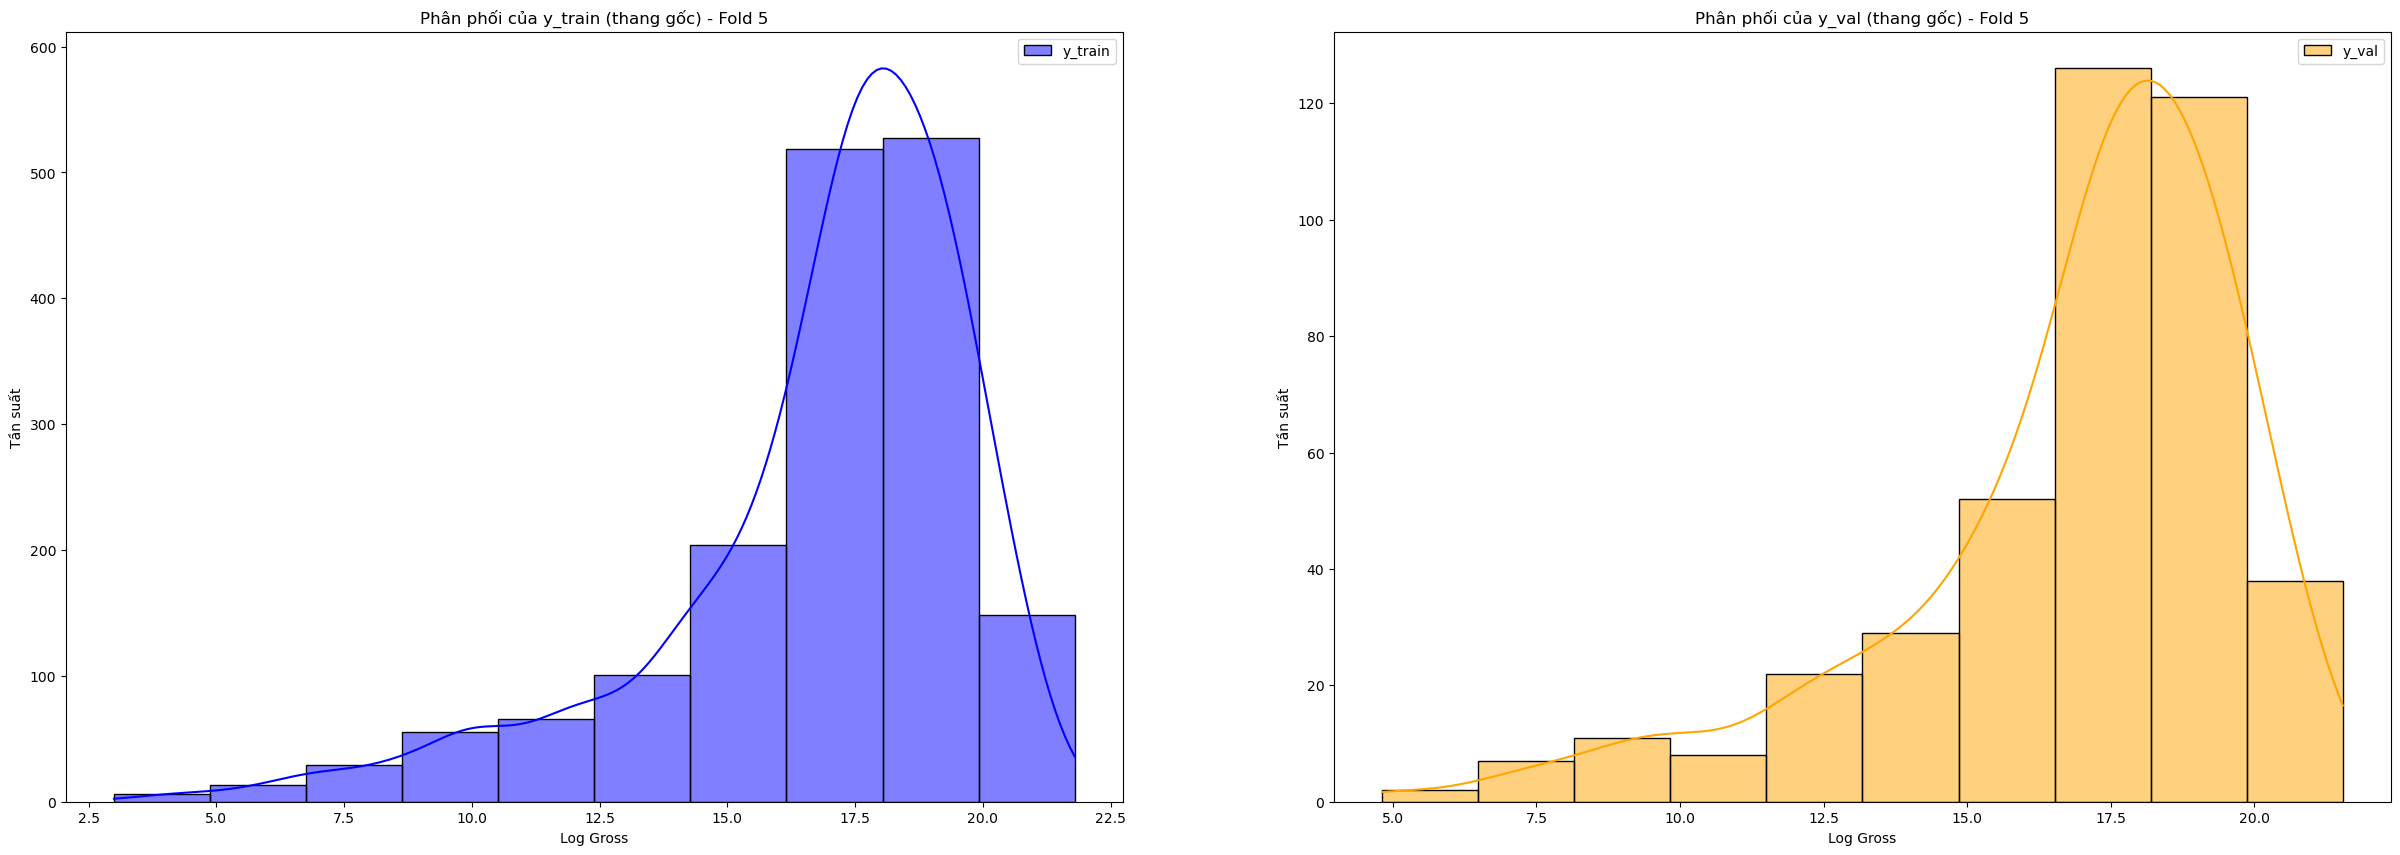

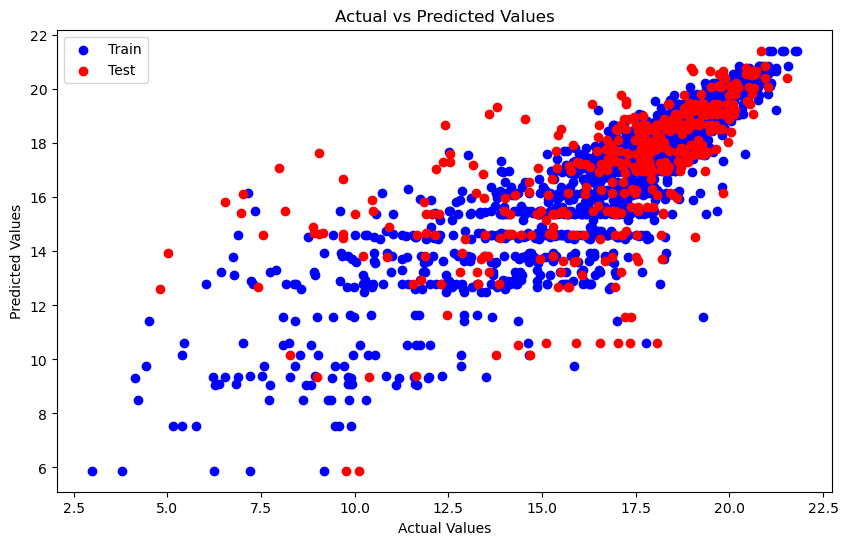

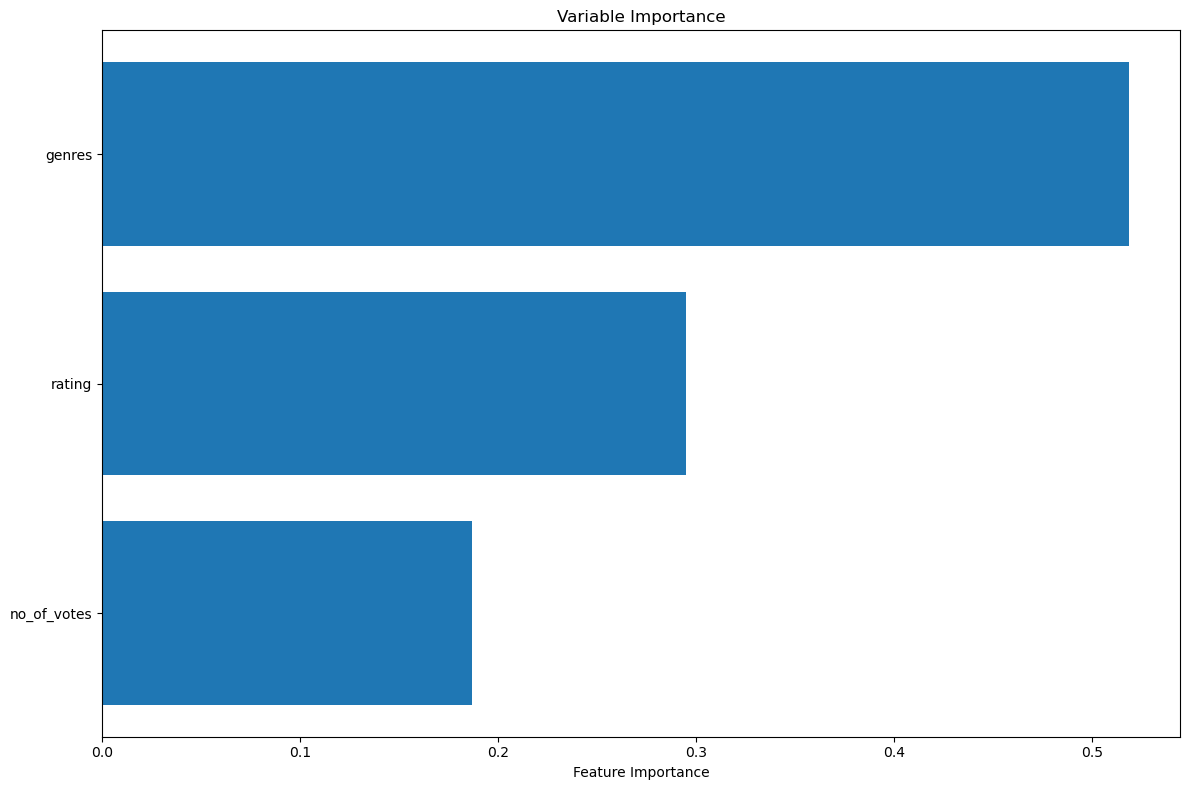

In [8]:
from evatuation import visualize_results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(df, df['log_gross_bin'])):
    print(f"Fold {fold + 1}")
    df_train = df.iloc[train_idx].copy()
    df_val = df.iloc[val_idx].copy()
    X_train, y_train, X_test, y_test = processing_data(df_train, df_val, fold=fold)
    model = DecisionTreeRegressor(
        max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42
    )
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    visualize_results(y_train, train_predictions, y_test, test_predictions, model = model, df = df, is_logged=True)


